<a href="https://colab.research.google.com/github/anonyblank/ml-zoomcamp-hw/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

--2023-10-23 17:51:54--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.4’

housing.csv.4       100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2023-10-23 17:51:54 (21.0 MB/s) - ‘housing.csv.4’ saved [1423529/1423529]



In [120]:
raw_data = pd.read_csv("housing.csv")

In [121]:
datasets = raw_data[raw_data['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [122]:
datasets.fillna(0, inplace=True)

<ipython-input-122-3722423aa50a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets.fillna(0, inplace=True)


In [123]:
datasets["log_median_house_values"] = np.log1p(datasets.median_house_value.values)

<ipython-input-123-e640c7091dff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets["log_median_house_values"] = np.log1p(datasets.median_house_value.values)


In [124]:
datasets.shape

(15687, 11)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
full_train_datasets, test_datasets = train_test_split(datasets, test_size=0.2, random_state=1)
train_datasets, val_datasets = train_test_split(full_train_datasets, test_size=0.25, random_state=1)

In [127]:
full_train_labels = full_train_datasets.log_median_house_values
train_labels = train_datasets.log_median_house_values
val_labels = val_datasets.log_median_house_values
test_labels = test_datasets.log_median_house_values

In [128]:
full_train_labels.shape

(12549,)

In [129]:
full_train_datasets

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_house_values
13673,-117.25,34.04,18.0,5761.0,1063.0,2763.0,1058.0,4.4472,161100.0,INLAND,11.989787
6611,-118.11,34.18,52.0,3571.0,510.0,1434.0,490.0,5.9009,376000.0,INLAND,12.837347
2649,-124.10,40.50,42.0,2380.0,553.0,1300.0,504.0,1.7574,57500.0,<1H OCEAN,10.959558
6789,-118.16,34.09,52.0,1722.0,448.0,1122.0,425.0,3.1204,224000.0,<1H OCEAN,12.319406
3826,-118.45,34.20,18.0,2729.0,800.0,2099.0,742.0,2.5842,230800.0,<1H OCEAN,12.349311
...,...,...,...,...,...,...,...,...,...,...,...
2206,-119.88,36.83,2.0,4055.0,735.0,1730.0,654.0,4.2132,96500.0,INLAND,11.477309
6652,-118.14,34.15,17.0,1896.0,674.0,971.0,652.0,0.8438,175000.0,<1H OCEAN,12.072547
15152,-117.05,33.01,17.0,3430.0,425.0,1468.0,433.0,10.6186,429300.0,<1H OCEAN,12.969914
1127,-121.60,39.76,22.0,2447.0,556.0,1157.0,556.0,1.8245,85500.0,INLAND,11.356283


In [130]:
del full_train_datasets["log_median_house_values"]
del train_datasets["log_median_house_values"]
del val_datasets["log_median_house_values"]
del test_datasets["log_median_house_values"]

del full_train_datasets["median_house_value"]
del train_datasets["median_house_value"]
del val_datasets["median_house_value"]
del test_datasets["median_house_value"]

In [131]:
from sklearn.feature_extraction import DictVectorizer

In [132]:
dv = DictVectorizer(sparse=False)

In [133]:
train_dicts = train_datasets.to_dict(orient="records")
val_dicts = val_datasets.to_dict(orient="records")
train_features = dv.fit_transform(train_dicts)
val_features = dv.transform(val_dicts)

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=1)

In [136]:
from sklearn.tree import export_text
tree_rules = export_text(dtr, feature_names=list(dv.get_feature_names_out()))
print(tree_rules)

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(train_features, train_labels)

val_pred_labels = rfr.predict(val_features)

print(np.round(np.sqrt(mean_squared_error(val_labels, val_pred_labels)), 3))

0.245


In [138]:
rmse_scores = []
best_rmse = float('inf')
best_n_estimators = None

for n_estimator in range(10, 201, 10):
  rfr = RandomForestRegressor(n_estimators=n_estimator, random_state=1, n_jobs=-1)
  rfr.fit(train_features, train_labels)

  val_pred_labels = rfr.predict(val_features)
  rmse = np.round(np.sqrt(mean_squared_error(val_labels, val_pred_labels)), 3)
  rmse_scores.append((n_estimator, rmse))

  if rmse < best_rmse:
    best_rmse = rmse
    best_n_estimators = n_estimator
  else:
    break  # RMSE has stopped improving, so break the loop
print(f"The RMSE stopped improving after {best_n_estimators} estimators.")

  # print(, 3))

The RMSE stopped improving after 50 estimators.


In [139]:
best_rmse

0.234

In [140]:
rmse_datasets = pd.DataFrame(rmse_scores, columns=["n_estimator", "rmse"])

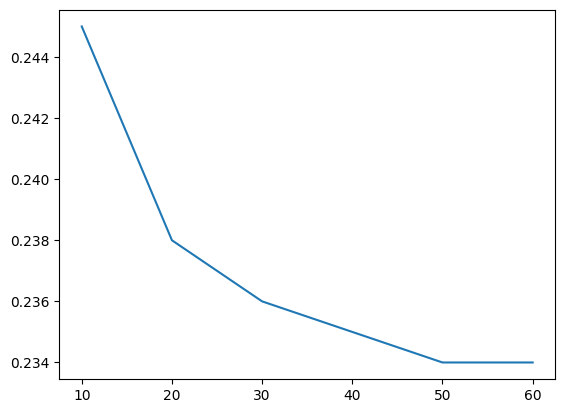

In [141]:
import matplotlib.pyplot as plt
plt.plot(rmse_datasets.n_estimator, rmse_datasets.rmse)

In [142]:
max_depth_values = [10, 15, 20, 25]
n_estimators = range(10, 201, 10)

best_mean_rmse = float('inf')
best_max_depth = None

mean_rmse_scores = []

for max_depth in max_depth_values:
  mean_rmse = 0
  for n_estimator in n_estimators:
    rfr = RandomForestRegressor(n_estimators=n_estimator, max_depth=max_depth, random_state=1, n_jobs=-1)
    rfr.fit(train_features, train_labels)

    val_pred_labels = rfr.predict(val_features)
    rmse = np.round(np.sqrt(mean_squared_error(val_labels, val_pred_labels)), 3)
    mean_rmse += rmse

  mean_rmse = mean_rmse / len(n_estimators)
  mean_rmse_scores.append((max_depth, mean_rmse))

  if mean_rmse < best_mean_rmse:
    best_mean_rmse = mean_rmse
    best_max_depth = max_depth

print(f"The best max_depth is {best_max_depth} with a mean RMSE of {best_mean_rmse:.3f}")

The best max_depth is 25 with a mean RMSE of 0.235


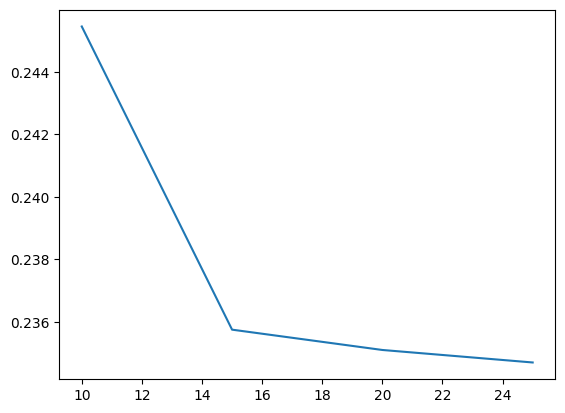

In [144]:
mean_rmse_datasets = pd.DataFrame(mean_rmse_scores, columns=["max_depth", "mean_rmse"])
plt.plot(mean_rmse_datasets.max_depth, mean_rmse_datasets.mean_rmse)

In [148]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

rfr.fit(train_features, train_labels)

feature_importance = rfr.feature_importances_
feature_importance_dict = dict(zip(dv.get_feature_names_out(), feature_importance))
# feature_importance_dict
most_important_feature = max(feature_importance_dict, key=feature_importance_dict.get)
print(f"The most important feature is: {most_important_feature}")


The most important feature is: median_income


In [154]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_features, label=train_labels)
dval = xgb.DMatrix(val_features, label=val_labels)

# Create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

# Train an XGBoost model with eta=0.3
xgb_params_03 = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_boost_round': 100  # 100 rounds
}

model_03 = xgb.train(xgb_params_03, dtrain, num_boost_round=xgb_params_03['num_boost_round'], evals=watchlist, early_stopping_rounds=10, verbose_eval=False)

# Calculate RMSE for eta=0.3
y_val_pred_03 = model_03.predict(dval)
rmse_03 = np.sqrt(mean_squared_error(val_labels, y_val_pred_03))

# Train an XGBoost model with eta=0.1
xgb_params_01 = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_boost_round': 100  # 100 rounds
}

model_01 = xgb.train(xgb_params_01, dtrain, num_boost_round=xgb_params_01['num_boost_round'], evals=watchlist, early_stopping_rounds=10, verbose_eval=False)

# Calculate RMSE for eta=0.1
y_val_pred_01 = model_01.predict(dval)
rmse_01 = np.sqrt(mean_squared_error(val_labels, y_val_pred_01))

print(f"RMSE for eta=0.3: {rmse_03:.4f}")
print(f"RMSE for eta=0.1: {rmse_01:.4f}")

if rmse_03 < rmse_01:
    print("eta=0.3 leads to the best RMSE score on the validation dataset.")
elif rmse_01 < rmse_03:
    print("eta=0.1 leads to the best RMSE score on the validation dataset.")
else:
    print("Both eta values give equal RMSE values.")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:15:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:15:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE for eta=0.3: 0.2319
RMSE for eta=0.1: 0.2321
eta=0.3 leads to the best RMSE score on the validation dataset.
